# Equivalent layer technique for estimating total magnetization direction using 

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st
from scipy.optimize import nnls
from fatiando.gridder import regular
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, PointGrid,Prism
from fatiando.gravmag import sphere,prism
from fatiando.constants import CM, T2NT, G, SI2MGAL

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
notebook_name = 'airborne_EQL_magdirection_RM_calculation.ipynb'

#### Importing auxiliary functions

In [4]:
dir_modules = '../../../mypackage'
sys.path.append(dir_modules)

In [5]:
import auxiliary_functions as fc

#### Loading properties of the model

In [6]:
with open('data/model_multi.pickle') as f:
        model_multi = pickle.load(f)

#### Loading properties grid

In [7]:
with open('data/airborne_survey.pickle') as f:
        airborne = pickle.load(f)

#### Loading data

In [8]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

#### Open a dictionary

In [9]:
result_RM_airb = dict()

### Saving files

In [10]:
saved_files = []

## Observation area

In [11]:
print 'Area limits: \n x_max = %.1f m \n x_min = %.1f m \n y_max = %.1f m \n y_min = %.1f m' % (airborne['area'][1], 
                                                                                                airborne['area'][0],
                                                                                                airborne['area'][3],
                                                                                                airborne['area'][2])

Area limits: 
 x_max = 5500.0 m 
 x_min = -6500.0 m 
 y_max = 6500.0 m 
 y_min = -5500.0 m


### airborne survey information

In [12]:
print 'Shape : (%.0f,%.0f)'% airborne['shape'] 
print 'Number of data: %.1f' % airborne['N']
print 'dx: %.1f m' % airborne['dx']
print 'dy: %.1f m ' % airborne['dy']

Shape : (49,25)
Number of data: 1225.0
dx: 250.0 m
dy: 500.0 m 


## Properties of the model

### Main field

In [13]:
inc_gf,dec_gf = model_multi['main_field']

In [14]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: -40.0 degree
Main field declination: -22.0 degree


### Magnetization direction

In [15]:
print 'Inclination: %.1f degree' % model_multi['inc_R']
print 'Declination: %.1f degree' % model_multi['dec_R']

Inclination: -25.0 degree
Declination: 30.0 degree


In [16]:
inc_R,dec_R = model_multi['inc_R'],model_multi['dec_R']

## Generating the layer with my function 

In [17]:
h = 1150.

#### Generating a layer

In [18]:
shape_layer = (airborne['shape'][0],airborne['shape'][1])

In [19]:
xs,ys,zs = regular(airborne['area'],shape_layer,h)

### Levenberg-Marquardt with NNLS for positive magnetic moments

In [20]:
i_pos = 1250

In [21]:
it_max = 30

In [22]:
it_marq = 15

In [23]:
lamb = 10.
dlamb = 100.

In [24]:
eps_e = 1e-4
eps_i = 1e-4

In [25]:
mu_list = [1e2,1e3,1e4,1e5,3.5*1e5,5*1e5,1e6,5*1e6] 

In [26]:
mu_norm = []
norm_r = []
norm_m = []
m_est = []
incl_est = []
decl_est = []
phi_list = []
for i in mu_list:
    m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.levenberg_marquardt_NNLS(
        data['tfa_obs_RM_airb'],airborne['x'],airborne['y'],
        airborne['z'],xs,ys,zs,inc_gf,dec_gf,-10.,-10.,lamb,dlamb,i_pos,it_max,
        it_marq,eps_e,eps_i,i)
    G = fc.sensitivity_mag(airborne['x'],airborne['y'],airborne['z'],
                       xs,ys,zs,inc_gf,dec_gf,inc_est,dec_est)
    tfpred = np.dot(G,m_LM)
    r = data['tfa_obs_RM_airb'] - tfpred 
    
    norm_r.append(np.sqrt(np.sum(r*r)))
    norm_m.append(np.sqrt(np.sum(m_LM*m_LM)))
    m_est.append(m_LM)
    incl_est.append(inc_est)
    decl_est.append(dec_est)
    phi_list.append(phi)

i = 0
-15.670783578 -7.91635029483
0.126353686885
i = 1
-19.4933411946 -5.51277916047
0.0909008017949
i = 2
-22.2912777609 -3.02214326308
0.0686757910379
i = 3
-24.426469689 -0.562978822459
0.0537262018823
i = 4
-26.1204977581 1.88232871301
0.0451941668666
i = 5
-27.4637394162 4.38842681595
0.0412474638697
i = 6
-28.4992845145 6.96308852526
0.0399509468627
i = 7
-29.2609849953 9.51970133346
0.0385313697957
i = 8
-29.7967986935 11.958246751
0.0360185531427
i = 9
-30.13144674 14.2600052081
0.0337541052245
i = 10
-30.3039192881 16.3702779994
0.0305295390178
i = 11
-30.3545177302 18.2460683767
0.0261994515877
i = 12
-30.3227123339 19.8780146452
0.021535344401
i = 13
-30.2478256646 21.2724091011
0.0169255182165
i = 14
-30.1525216489 22.4439950548
0.0127138490191
i = 15
-30.0470064408 23.4178967023
0.00925658515614
i = 16
-29.9440496501 24.2255620104
0.00662705558547
i = 17
-29.8498727501 24.9036955556
0.00480885871655
i = 18
-29.7697974233 25.4683290517
0.00339462011461
i = 19
-29.697507207

-30.2907695109 16.4834164514
0.0282928831112
i = 11
-30.339281164 18.3463981467
0.0240159432446
i = 12
-30.3109939169 19.9610463425
0.0195004240138
i = 13
-30.2368808215 21.3408575935
0.0152770311544
i = 14
-30.134801151 22.5034562731
0.0115539568974
i = 15
-30.0236874376 23.46996243
0.00841137882615
i = 16
-29.9163622253 24.2707319797
0.00601149850642
i = 17
-29.8199467765 24.9392864047
0.00430906040646
i = 18
-29.7369777737 25.4985414842
0.00307038768111
i = 19
-29.6620143422 25.9914208796
0.00241926839031
i = 20
-29.5943915128 26.4287783396
0.00192647004402
i = 21
-29.5344778705 26.8185834716
0.00154155954583
i = 22
-29.481727042 27.1716346247
0.00126992764526
i = 23
-29.4363582609 27.4928044672
0.00105182288029
i = 24
-29.3958350861 27.7858953791
0.000878512147748
i = 25
-29.358264268 28.0557915915
0.000748302765408
i = 26
-29.3230645203 28.3052536243
0.00064214840618
i = 27
-29.2891141726 28.5380981603
0.000562652891259
i = 28
-29.2558341728 28.7565197771
0.000498376682127
i = 29


-29.2580375666 30.8408827512
0.000101050066125
i = 36
-29.2580375666 30.8408827512
0.0
i = 0
-19.9200750117 -5.4939529744
0.090471373357
i = 1
-26.2685432024 0.779799116992
0.0726125302397
i = 2
-30.3372572096 7.43975134792
0.0549684402171
i = 3
-32.7378065164 13.6949866401
0.0393097532114
i = 4
-33.9489758523 18.9881184969
0.0257076480002
i = 5
-34.4086896361 23.0603598129
0.014989234888
i = 6
-34.4657204381 25.9958753242
0.00800806702151
i = 7
-34.3384243491 28.0309378206
0.00405578634771
i = 8
-34.1496054213 29.4246849696
0.00203411480755
i = 9
-33.9516881524 30.385171161
0.00104469482598
i = 10
-33.7645269834 31.0577092451
0.000560837472786
i = 11
-33.5960315742 31.5345587953
0.000312727724663
i = 12
-33.4480169244 31.8771645231
0.000181291241782
i = 13
-33.3201968972 32.1258463273
0.000108326553305
i = 14
-33.3201968972 32.1258463273
0.0


## L-curve visualization

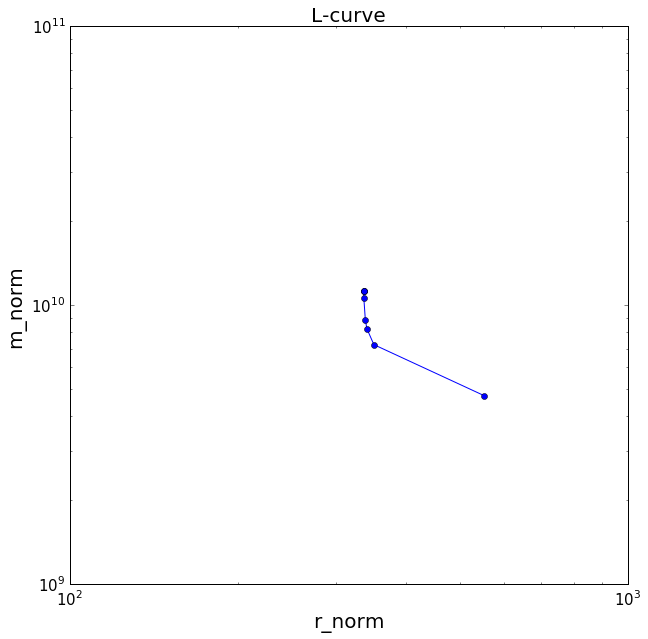

In [27]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.figure(figsize=(10, 10))
plt.loglog(norm_r,norm_m, 'b-')
plt.loglog(norm_r,norm_m, 'bo')
plt.title('L-curve', fontsize=title_font)
plt.xlabel('r_norm', fontsize = title_font)
plt.ylabel('m_norm', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

file_name = 'figs/airborne/Lcurve_RM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Results

In [28]:
result_RM_airb['magnetic_moment'] = m_est
result_RM_airb['inc_est'] = incl_est
result_RM_airb['dec_est'] = decl_est
result_RM_airb['layer_depth'] = h
result_RM_airb['reg_parameter'] = mu_list
result_RM_airb['phi'] = phi_list

### Generating .pickle file

In [29]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
result_RM_airb['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [30]:
file_name = 'data/result_RM_airb.pickle'
with open(file_name, 'w') as f:
    pickle.dump(result_RM_airb, f)
    
saved_files.append(file_name)

### Saved files

In [31]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/airborne/Lcurve_RM.png
2  figs/airborne/Lcurve_RM.eps
3  data/result_RM_airb.pickle
